In [1]:
import numpy as np
import pandas as pd
import os
import gc
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#credit_balance = pd.read_csv('/content/input/credit_card_balance.csv')
#instalment_payments = pd.read_csv('/content/input/installments_payments.csv')
#prev_applications = pd.read_csv('/content/input/previous_application.csv')
#pos_cashbalance = pd.read_csv('/content/input/POS_CASH_balance.csv')

In [3]:
app_train = pd.read_csv('../input/home-credit-default-risk/application_train.csv')
app_test = pd.read_csv('../input/home-credit-default-risk/application_test.csv')

In [4]:
bureau = pd.read_csv('../input/home-credit-default-risk/bureau.csv')
bureau.shape

(1716428, 17)

In [5]:
bureau.head(10)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.00,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.00,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21,NaN
5,215354,5714467,Active,currency 1,-273,0,27460.0,NaN,0.0,0,180000.00,71017.38,108982.62,0.0,Credit card,-31,NaN
6,215354,5714468,Active,currency 1,-43,0,79.0,NaN,0.0,0,42103.80,42103.80,0.00,0.0,Consumer credit,-22,NaN
7,162297,5714469,Closed,currency 1,-1896,0,-1684.0,-1710.0,14985.0,0,76878.45,0.00,0.00,0.0,Consumer credit,-1710,NaN
8,162297,5714470,Closed,currency 1,-1146,0,-811.0,-840.0,0.0,0,103007.70,0.00,0.00,0.0,Consumer credit,-840,NaN
9,162297,5714471,Active,currency 1,-1146,0,-484.0,NaN,0.0,0,4500.00,0.00,0.00,0.0,Credit card,-690,NaN


Let's engineer some features from this dataset and merge them to the train and test dataframes

In [6]:
bureau = bureau.sort_values(by=['SK_ID_CURR', 'SK_ID_BUREAU'])
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
248484,100001,5896630,Closed,currency 1,-857,0,-492.0,-553.0,NaN,0,112500.0,0.0,0.0,0.0,Consumer credit,-155,0.0
248485,100001,5896631,Closed,currency 1,-909,0,-179.0,-877.0,NaN,0,279720.0,0.0,0.0,0.0,Consumer credit,-155,0.0
248486,100001,5896632,Closed,currency 1,-879,0,-514.0,-544.0,NaN,0,91620.0,0.0,0.0,0.0,Consumer credit,-155,0.0
248487,100001,5896633,Closed,currency 1,-1572,0,-1329.0,-1328.0,NaN,0,85500.0,0.0,0.0,0.0,Consumer credit,-155,0.0
248488,100001,5896634,Active,currency 1,-559,0,902.0,NaN,NaN,0,337680.0,113166.0,0.0,0.0,Consumer credit,-6,4630.5


In [7]:
# For the numeric values in the bureau dataframe, we need to calculate aggregates grouped by mean, sum, min, max

# for example on AMT_CREDIT_SUM 
bur_total_amt = bureau.groupby('SK_ID_CURR')['AMT_CREDIT_SUM'].sum()
bur_avg_amt = bureau.groupby('SK_ID_CURR')['AMT_CREDIT_SUM'].mean()
bur_total_amt

SK_ID_CURR
100001    1453365.000
100002     865055.565
100003    1017400.500
100004     189037.800
100005     657126.000
             ...     
456249    3693858.660
456250    3086459.550
456253    3960000.000
456254      45000.000
456255    3801919.500
Name: AMT_CREDIT_SUM, Length: 305811, dtype: float64

In [8]:
# a fast way to this for the features in the bureau df

bureau_agg = bureau.drop(columns = ['SK_ID_BUREAU']).groupby('SK_ID_CURR', as_index = False).agg(['count', 'mean', 'max', 'min', 'sum']).reset_index()
bureau_agg.head()

SK_ID_CURR DAYS_CREDIT                               CREDIT_DAY_OVERDUE  \
                   count         mean  max   min   sum              count   
0     100001           7  -735.000000  -49 -1572 -5145                  7   
1     100002           8  -874.000000 -103 -1437 -6992                  8   
2     100003           4 -1400.750000 -606 -2586 -5603                  4   
3     100004           2  -867.000000 -408 -1326 -1734                  2   
4     100005           3  -190.666667  -62  -373  -572                  3   

                ... DAYS_CREDIT_UPDATE                               \
  mean max min  ...              count        mean  max   min   sum   
0  0.0   0   0  ...                  7  -93.142857   -6  -155  -652   
1  0.0   0   0  ...                  8 -499.875000   -7 -1185 -3999   
2  0.0   0   0  ...                  4 -816.000000  -43 -2131 -3264   
3  0.0   0   0  ...                  2 -532.000000 -382  -682 -1064   
4  0.0   0   0  ...                  3  -54.333333  -11  -121  -163   

  AMT_ANNUITY                                      
        count         mean      max  min      sum  
0           7  3545.357143  10822.5  0.0  24817.5  
1           7     0.000000      0.0  0.0      0.0  
2           0          NaN      NaN  NaN      0.0  
3           0          NaN      NaN  NaN      0.0  
4           3  1420.500000   4261.5  0.0   4261.5  

[5 rows x 61 columns]

We have a hierarchical indexing here. A good way to store the name of the columns is to use the feature.agg (eg DAYS_CREDIT.count)

In [9]:
bureau_agg.columns.levels[0]

Index(['DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'DAYS_CREDIT_UPDATE', 'AMT_ANNUITY',
       'SK_ID_CURR'],
      dtype='object')

In [10]:
columns = ['SK_ID_CURR']

for feature in bureau_agg.columns.levels[0]:
    if feature != 'SK_ID_CURR': # doesnt apply to SK_ID_CURR
        for x in bureau_agg.columns.levels[1][:-1]:
            columns.append(f"bureau_{feature}_{x}")

In [11]:
columns[:10]

['SK_ID_CURR',
 'bureau_DAYS_CREDIT_count',
 'bureau_DAYS_CREDIT_mean',
 'bureau_DAYS_CREDIT_max',
 'bureau_DAYS_CREDIT_min',
 'bureau_DAYS_CREDIT_sum',
 'bureau_CREDIT_DAY_OVERDUE_count',
 'bureau_CREDIT_DAY_OVERDUE_mean',
 'bureau_CREDIT_DAY_OVERDUE_max',
 'bureau_CREDIT_DAY_OVERDUE_min']

In [12]:
# let's rename the columns in bureau_agg
bureau_agg.columns = columns
bureau_agg.head()

,SK_ID_CURR,bureau_DAYS_CREDIT_count,bureau_DAYS_CREDIT_mean,bureau_DAYS_CREDIT_max,bureau_DAYS_CREDIT_min,bureau_DAYS_CREDIT_sum,bureau_CREDIT_DAY_OVERDUE_count,bureau_CREDIT_DAY_OVERDUE_mean,bureau_CREDIT_DAY_OVERDUE_max,bureau_CREDIT_DAY_OVERDUE_min,...,bureau_DAYS_CREDIT_UPDATE_count,bureau_DAYS_CREDIT_UPDATE_mean,bureau_DAYS_CREDIT_UPDATE_max,bureau_DAYS_CREDIT_UPDATE_min,bureau_DAYS_CREDIT_UPDATE_sum,bureau_AMT_ANNUITY_count,bureau_AMT_ANNUITY_mean,bureau_AMT_ANNUITY_max,bureau_AMT_ANNUITY_min,bureau_AMT_ANNUITY_sum
0,100001,7,-735.000000,-49,-1572,-5145,7,0.0,0,0,...,7,-93.142857,-6,-155,-652,7,3545.357143,10822.5,0.0,24817.5
1,100002,8,-874.000000,-103,-1437,-6992,8,0.0,0,0,...,8,-499.875000,-7,-1185,-3999,7,0.000000,0.0,0.0,0.0
2,100003,4,-1400.750000,-606,-2586,-5603,4,0.0,0,0,...,4,-816.000000,-43,-2131,-3264,0,NaN,NaN,NaN,0.0
3,100004,2,-867.000000,-408,-1326,-1734,2,0.0,0,0,...,2,-532.000000,-382,-682,-1064,0,NaN,NaN,NaN,0.0
4,100005,3,-190.666667,-62,-373,-572,3,0.0,0,0,...,3,-54.333333,-11,-121,-163,3,1420.500000,4261.5,0.0,4261.5


In [13]:
# let's merge with the train data
app_train = app_train.merge(bureau_agg, on='SK_ID_CURR', how='left')
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,bureau_DAYS_CREDIT_UPDATE_count,bureau_DAYS_CREDIT_UPDATE_mean,bureau_DAYS_CREDIT_UPDATE_max,bureau_DAYS_CREDIT_UPDATE_min,bureau_DAYS_CREDIT_UPDATE_sum,bureau_AMT_ANNUITY_count,bureau_AMT_ANNUITY_mean,bureau_AMT_ANNUITY_max,bureau_AMT_ANNUITY_min,bureau_AMT_ANNUITY_sum
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,8.0,-499.875,-7.0,-1185.0,-3999.0,7.0,0.0,0.0,0.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,4.0,-816.000,-43.0,-2131.0,-3264.0,0.0,NaN,NaN,NaN,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,2.0,-532.000,-382.0,-682.0,-1064.0,0.0,NaN,NaN,NaN,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,1.0,-783.000,-783.0,-783.0,-783.0,0.0,NaN,NaN,NaN,0.0


In [14]:
app_train[columns].head()

,SK_ID_CURR,bureau_DAYS_CREDIT_count,bureau_DAYS_CREDIT_mean,bureau_DAYS_CREDIT_max,bureau_DAYS_CREDIT_min,bureau_DAYS_CREDIT_sum,bureau_CREDIT_DAY_OVERDUE_count,bureau_CREDIT_DAY_OVERDUE_mean,bureau_CREDIT_DAY_OVERDUE_max,bureau_CREDIT_DAY_OVERDUE_min,...,bureau_DAYS_CREDIT_UPDATE_count,bureau_DAYS_CREDIT_UPDATE_mean,bureau_DAYS_CREDIT_UPDATE_max,bureau_DAYS_CREDIT_UPDATE_min,bureau_DAYS_CREDIT_UPDATE_sum,bureau_AMT_ANNUITY_count,bureau_AMT_ANNUITY_mean,bureau_AMT_ANNUITY_max,bureau_AMT_ANNUITY_min,bureau_AMT_ANNUITY_sum
0,100002,8.0,-874.00,-103.0,-1437.0,-6992.0,8.0,0.0,0.0,0.0,...,8.0,-499.875,-7.0,-1185.0,-3999.0,7.0,0.0,0.0,0.0,0.0
1,100003,4.0,-1400.75,-606.0,-2586.0,-5603.0,4.0,0.0,0.0,0.0,...,4.0,-816.000,-43.0,-2131.0,-3264.0,0.0,NaN,NaN,NaN,0.0
2,100004,2.0,-867.00,-408.0,-1326.0,-1734.0,2.0,0.0,0.0,0.0,...,2.0,-532.000,-382.0,-682.0,-1064.0,0.0,NaN,NaN,NaN,0.0
3,100006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,1.0,-1149.00,-1149.0,-1149.0,-1149.0,1.0,0.0,0.0,0.0,...,1.0,-783.000,-783.0,-783.0,-783.0,0.0,NaN,NaN,NaN,0.0


In [15]:
# let's see how important these features are with correlation

corrs = []
for column in columns:
    corr = app_train['TARGET'].corr(app_train[column])
    corrs.append((column, corr))

In [16]:
 # sort by absolute values
corrs = sorted(corrs, key = lambda x: abs(x[1]), reverse = True) 
corrs[:15]

[('bureau_DAYS_CREDIT_mean', 0.08972896721998114),
 ('bureau_DAYS_CREDIT_min', 0.0752482510301036),
 ('bureau_DAYS_CREDIT_UPDATE_mean', 0.06892735266968673),
 ('bureau_DAYS_ENDDATE_FACT_min', 0.05588737984392077),
 ('bureau_DAYS_CREDIT_ENDDATE_sum', 0.0537348956010205),
 ('bureau_DAYS_ENDDATE_FACT_mean', 0.05319962585758616),
 ('bureau_DAYS_CREDIT_max', 0.04978205463997299),
 ('bureau_DAYS_ENDDATE_FACT_sum', 0.048853502611115894),
 ('bureau_DAYS_CREDIT_ENDDATE_mean', 0.046982754334835494),
 ('bureau_DAYS_CREDIT_UPDATE_min', 0.042863922470730155),
 ('bureau_DAYS_CREDIT_sum', 0.041999824814846716),
 ('bureau_DAYS_CREDIT_UPDATE_sum', 0.04140363535306002),
 ('bureau_DAYS_CREDIT_ENDDATE_max', 0.036589634696329094),
 ('bureau_DAYS_CREDIT_ENDDATE_min', 0.034281109921616024),
 ('bureau_DAYS_ENDDATE_FACT_count', -0.030492306653325495)]

These are weak correlations with the TARGET. We can't be sure of how much they'll contribute to predicting TARGET. 

Let's see a KDE plot for the column with the highest correlation score

In [17]:
plt.style.use('fivethirtyeight')

In [18]:
def plot_kde(col, df):
    corr = df['TARGET'].corr(df[col])
    avg_repaid = df.loc[df['TARGET'] == 0, col].median()
    avg_notrepaid = df.loc[df['TARGET'] == 1, col].median()
    
    print(f"The correlation between {col} and the TARGET is {corr}")
    print(f"Median value for loan that was not repaid = {round(avg_notrepaid, 2)}")
    print(f"Median value for loan that was repaid = {round(avg_repaid, 2)}")
    
    plt.figure(figsize=(10, 6)) 
    sns.kdeplot(df.loc[df['TARGET'] == 0, col], label='target == 0')
    sns.kdeplot(df.loc[df['TARGET'] == 1, col], label='target == 1')
    
    plt.title(f"Distribution of {col} by Target Value")
    plt.xlabel(f"{col}")
    plt.ylabel("Density")
    plt.legend()
    plt.tight_layout(h_pad = 2.5)

The correlation between bureau_DAYS_CREDIT_mean and the TARGET is 0.08972896721998114
Median value for loan that was not repaid = -835.33
Median value for loan that was repaid = -1067.0


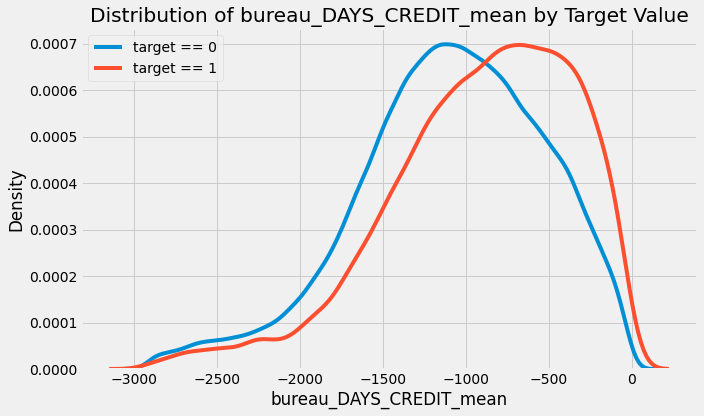

In [19]:
plot_kde('bureau_DAYS_CREDIT_mean', app_train)

From the data description file, DAYS_CREDIT refers to How many days before current application did client apply for Credit Bureau credit,time only relative to the application.

Most of the new features have weak correlation with the TARGET features as seen above in the correlation

In [20]:
# let's deal with the categorical features
bureau.select_dtypes(include='object')

,CREDIT_ACTIVE,CREDIT_CURRENCY,CREDIT_TYPE
248484,Closed,currency 1,Consumer credit
248485,Closed,currency 1,Consumer credit
248486,Closed,currency 1,Consumer credit
248487,Closed,currency 1,Consumer credit
248488,Active,currency 1,Consumer credit
...,...,...,...
1010009,Active,currency 1,Consumer credit
1010010,Active,currency 1,Consumer credit
1010011,Closed,currency 1,Consumer credit
1010012,Closed,currency 1,Credit card


In [21]:
# let's encode these features
bureau_categorical = pd.get_dummies(bureau.select_dtypes(include='object'))
bureau_categorical['SK_ID_CURR'] = bureau['SK_ID_CURR'] # add the key back
bureau_categorical.head()

,CREDIT_ACTIVE_Active,CREDIT_ACTIVE_Bad debt,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold,CREDIT_CURRENCY_currency 1,CREDIT_CURRENCY_currency 2,CREDIT_CURRENCY_currency 3,CREDIT_CURRENCY_currency 4,CREDIT_TYPE_Another type of loan,CREDIT_TYPE_Car loan,...,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for purchase of shares (margin lending),CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mobile operator loan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan,SK_ID_CURR
248484,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,100001
248485,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,100001
248486,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,100001
248487,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,100001
248488,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,100001


In [22]:
# let's have the aggregate for these functions as well
categorical_agg = bureau_categorical.groupby('SK_ID_CURR', as_index = False).agg(['max', 'mean', 'sum']).reset_index()
categorical_agg.head()

SK_ID_CURR CREDIT_ACTIVE_Active               CREDIT_ACTIVE_Bad debt       \
                              max      mean sum                    max mean   
0     100001                    1  0.428571   3                      0  0.0   
1     100002                    1  0.250000   2                      0  0.0   
2     100003                    1  0.250000   1                      0  0.0   
3     100004                    0  0.000000   0                      0  0.0   
4     100005                    1  0.666667   2                      0  0.0   

      CREDIT_ACTIVE_Closed                ...  \
  sum                  max      mean sum  ...   
0   0                    1  0.571429   4  ...   
1   0                    1  0.750000   6  ...   
2   0                    1  0.750000   3  ...   
3   0                    1  1.000000   2  ...   
4   0                    1  0.333333   1  ...   

  CREDIT_TYPE_Mobile operator loan CREDIT_TYPE_Mortgage           \
                               sum                  max mean sum   
0                                0                    0  0.0   0   
1                                0                    0  0.0   0   
2                                0                    0  0.0   0   
3                                0                    0  0.0   0   
4                                0                    0  0.0   0   

  CREDIT_TYPE_Real estate loan          CREDIT_TYPE_Unknown type of loan       \
                           max mean sum                              max mean   
0                            0  0.0   0                                0  0.0   
1                            0  0.0   0                                0  0.0   
2                            0  0.0   0                                0  0.0   
3                            0  0.0   0                                0  0.0   
4                            0  0.0   0                                0  0.0   

       
  sum  
0   0  
1   0  
2   0  
3   0  
4   0  

[5 rows x 70 columns]

In [23]:
# just like above let's remove the hierarchical indexing structure
columns = ['SK_ID_CURR']

for feature in categorical_agg.columns.levels[0]:
    if feature != 'SK_ID_CURR': # doesnt apply to SK_ID_CURR
        for x in categorical_agg.columns.levels[1][:-1]:
            columns.append(f"bureau_{feature}_{x}")

columns[:10]

['SK_ID_CURR',
 'bureau_CREDIT_ACTIVE_Active_max',
 'bureau_CREDIT_ACTIVE_Active_mean',
 'bureau_CREDIT_ACTIVE_Active_sum',
 'bureau_CREDIT_ACTIVE_Bad debt_max',
 'bureau_CREDIT_ACTIVE_Bad debt_mean',
 'bureau_CREDIT_ACTIVE_Bad debt_sum',
 'bureau_CREDIT_ACTIVE_Closed_max',
 'bureau_CREDIT_ACTIVE_Closed_mean',
 'bureau_CREDIT_ACTIVE_Closed_sum']

In [24]:
categorical_agg.columns = columns
categorical_agg.head()

,SK_ID_CURR,bureau_CREDIT_ACTIVE_Active_max,bureau_CREDIT_ACTIVE_Active_mean,bureau_CREDIT_ACTIVE_Active_sum,bureau_CREDIT_ACTIVE_Bad debt_max,bureau_CREDIT_ACTIVE_Bad debt_mean,bureau_CREDIT_ACTIVE_Bad debt_sum,bureau_CREDIT_ACTIVE_Closed_max,bureau_CREDIT_ACTIVE_Closed_mean,bureau_CREDIT_ACTIVE_Closed_sum,...,bureau_CREDIT_TYPE_Mobile operator loan_sum,bureau_CREDIT_TYPE_Mortgage_max,bureau_CREDIT_TYPE_Mortgage_mean,bureau_CREDIT_TYPE_Mortgage_sum,bureau_CREDIT_TYPE_Real estate loan_max,bureau_CREDIT_TYPE_Real estate loan_mean,bureau_CREDIT_TYPE_Real estate loan_sum,bureau_CREDIT_TYPE_Unknown type of loan_max,bureau_CREDIT_TYPE_Unknown type of loan_mean,bureau_CREDIT_TYPE_Unknown type of loan_sum
0,100001,1,0.428571,3,0,0.0,0,1,0.571429,4,...,0,0,0.0,0,0,0.0,0,0,0.0,0
1,100002,1,0.250000,2,0,0.0,0,1,0.750000,6,...,0,0,0.0,0,0,0.0,0,0,0.0,0
2,100003,1,0.250000,1,0,0.0,0,1,0.750000,3,...,0,0,0.0,0,0,0.0,0,0,0.0,0
3,100004,0,0.000000,0,0,0.0,0,1,1.000000,2,...,0,0,0.0,0,0,0.0,0,0,0.0,0
4,100005,1,0.666667,2,0,0.0,0,1,0.333333,1,...,0,0,0.0,0,0,0.0,0,0,0.0,0


In [25]:
# let's merge this column to the application_train dataframe
app_train = app_train.merge(categorical_agg, on='SK_ID_CURR', how='left')
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,bureau_CREDIT_TYPE_Mobile operator loan_sum,bureau_CREDIT_TYPE_Mortgage_max,bureau_CREDIT_TYPE_Mortgage_mean,bureau_CREDIT_TYPE_Mortgage_sum,bureau_CREDIT_TYPE_Real estate loan_max,bureau_CREDIT_TYPE_Real estate loan_mean,bureau_CREDIT_TYPE_Real estate loan_sum,bureau_CREDIT_TYPE_Unknown type of loan_max,bureau_CREDIT_TYPE_Unknown type of loan_mean,bureau_CREDIT_TYPE_Unknown type of loan_sum
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Functions to Wrap Things

Since we need to do this for several dataframes, we need to wrap everything into functions. We need to do this:
1. aggregate the numeric features from each dataframe. Engineer new features if possible
2. Merge the train and test dataframes with these features
3. See the correlations to gain insight into what's probably going to work
4. Encode the categorical variables and also merge with the train and test dataframes

In [26]:
# let's initiate this with with fresh dataframes

del app_train, bureau, bureau_agg, bureau_categorical

gc.collect()

3551

In [27]:
app_train = pd.read_csv('../input/home-credit-default-risk/application_train.csv')
app_test = pd.read_csv('../input/home-credit-default-risk/application_test.csv')
bureau = pd.read_csv('../input/home-credit-default-risk/bureau.csv')

In [28]:
def numeric_agg(df,cols, group_var, df_name):
    """Performs statistical aggregates(mean, sum etc) on the dataframes
    Args: 
        df:  the dataframe to perform the statisical aggregates on
        cols: the columns to aggregate on
        group_var: the column to groupby
        df_name : the name of dataframe to rename the columns
  Returns: 
          df_agg: the df of statistical aggregates
          """  
    df_agg = df[cols].groupby(group_var, as_index = False).agg(['count', 'mean', 'max', 'min', 'sum']).reset_index() # perfoms the statistical aggregates
    columns = [group_var]
    
    for feature in df_agg.columns.levels[0]:
        if feature != group_var: 
            for x in df_agg.columns.levels[1][:-1]:
                columns.append(f"{df_name}_{feature}_{x}")
                
    df_agg.columns = columns # rename the columns
    return df_agg

In [29]:
# encoding the categorical features

def encode_categorical(df, group_var, df_name):
    """Encodes the categorical variables in the dataframe
  Args: 
        df:  the dataframe to encode
        cols: the columns to aggregate o
        group_var: the column to groupby
        df_name : the name of dataframe to rename the columns
  Returns: 
        categorical_agg: the df of statistical aggregates of categorical columns
          """ 
    df_categorical = pd.get_dummies(df.select_dtypes(include='object'))
    df_categorical[group_var] = df[group_var] # add the key back
    categorical_agg = df_categorical.groupby(group_var, as_index = False).agg(['mean', 'sum']).reset_index()
    
    columns = [group_var]
    for feature in categorical_agg.columns.levels[0]:
        if feature != group_var: 
            for x in categorical_agg.columns.levels[1][:-1]:
                columns.append(f"{df_name}_{feature}_{x}")
                
    categorical_agg.columns = columns
    return categorical_agg

In [30]:
def columns_corr_target(columns):
    """Function computes the linear correlation of the features created with the TARGET
  We have to merge the created columns to the train before we can use this function
  Args: 
        columns: the new features added to the dataframe"""
    corrs = []
    for column in columns:
        corr = app_train['TARGET'].corr(app_train[column])
        corrs.append((column, corr))
        
    corrs = sorted(corrs, key = lambda x: abs(x[1]), reverse = True) 
    print(corrs[:15])

## Bureau

In [31]:
# for the bureau dataframe
bureau_temp = bureau.drop(columns=['SK_ID_BUREAU']) # we don't want aggregates from the BUREAU key
cols = bureau_temp.select_dtypes(exclude='object').columns

bur_numeric = numeric_agg(bureau_temp, cols, 'SK_ID_CURR', 'bureau')

In [32]:
# let's encode the categorical features
bur_categorical = encode_categorical(bureau, 'SK_ID_CURR', 'bureau')

In [33]:
# we can add some new features
prev_count = bureau.groupby('SK_ID_CURR', as_index=False)['SK_ID_BUREAU'].count().rename(columns={'SK_ID_BUREAU': 'prev_loan_counts'})
bur_active_cnt = bureau.loc[bureau['CREDIT_ACTIVE'] == 'Active'].groupby('SK_ID_CURR', as_index=False)['SK_ID_BUREAU'].count().rename(columns={'SK_ID_BUREAU': 'active_loan_counts'})
bur_closed_cnt = bureau.loc[bureau['CREDIT_ACTIVE'] == 'Closed'].groupby('SK_ID_CURR', as_index=False)['SK_ID_BUREAU'].count().rename(columns={'SK_ID_BUREAU': 'closed_loan_counts'})

# let's merge these features with the bur_numeric
bur_numeric = bur_numeric.merge(prev_count, on='SK_ID_CURR', how='inner')
bur_numeric = bur_numeric.merge(bur_active_cnt, on='SK_ID_CURR', how='inner')
bur_numeric = bur_numeric.merge(bur_closed_cnt, on='SK_ID_CURR', how='inner')

# fill the missing values with 0
bur_numeric['prev_loan_counts'] = bur_numeric['prev_loan_counts'].fillna(0)
bur_numeric['active_loan_counts'] = bur_numeric['active_loan_counts'].fillna(0)
bur_numeric['closed_loan_counts'] = bur_numeric['closed_loan_counts'].fillna(0)

In [34]:
bur_numeric.head()

,SK_ID_CURR,bureau_DAYS_CREDIT_count,bureau_DAYS_CREDIT_mean,bureau_DAYS_CREDIT_max,bureau_DAYS_CREDIT_min,bureau_DAYS_CREDIT_sum,bureau_CREDIT_DAY_OVERDUE_count,bureau_CREDIT_DAY_OVERDUE_mean,bureau_CREDIT_DAY_OVERDUE_max,bureau_CREDIT_DAY_OVERDUE_min,...,bureau_DAYS_CREDIT_UPDATE_min,bureau_DAYS_CREDIT_UPDATE_sum,bureau_AMT_ANNUITY_count,bureau_AMT_ANNUITY_mean,bureau_AMT_ANNUITY_max,bureau_AMT_ANNUITY_min,bureau_AMT_ANNUITY_sum,prev_loan_counts,active_loan_counts,closed_loan_counts
0,100001,7,-735.000000,-49,-1572,-5145,7,0.0,0,0,...,-155,-652,7,3545.357143,10822.5,0.0,24817.5,7,3,4
1,100002,8,-874.000000,-103,-1437,-6992,8,0.0,0,0,...,-1185,-3999,7,0.000000,0.0,0.0,0.0,8,2,6
2,100003,4,-1400.750000,-606,-2586,-5603,4,0.0,0,0,...,-2131,-3264,0,NaN,NaN,NaN,0.0,4,1,3
3,100005,3,-190.666667,-62,-373,-572,3,0.0,0,0,...,-121,-163,3,1420.500000,4261.5,0.0,4261.5,3,2,1
4,100008,3,-757.333333,-78,-1097,-2272,3,0.0,0,0,...,-1027,-1833,0,NaN,NaN,NaN,0.0,3,1,2


In [35]:
bur_categorical.head()

,SK_ID_CURR,bureau_CREDIT_ACTIVE_Active_mean,bureau_CREDIT_ACTIVE_Active_sum,bureau_CREDIT_ACTIVE_Bad debt_mean,bureau_CREDIT_ACTIVE_Bad debt_sum,bureau_CREDIT_ACTIVE_Closed_mean,bureau_CREDIT_ACTIVE_Closed_sum,bureau_CREDIT_ACTIVE_Sold_mean,bureau_CREDIT_ACTIVE_Sold_sum,bureau_CREDIT_CURRENCY_currency 1_mean,...,bureau_CREDIT_TYPE_Microloan_mean,bureau_CREDIT_TYPE_Microloan_sum,bureau_CREDIT_TYPE_Mobile operator loan_mean,bureau_CREDIT_TYPE_Mobile operator loan_sum,bureau_CREDIT_TYPE_Mortgage_mean,bureau_CREDIT_TYPE_Mortgage_sum,bureau_CREDIT_TYPE_Real estate loan_mean,bureau_CREDIT_TYPE_Real estate loan_sum,bureau_CREDIT_TYPE_Unknown type of loan_mean,bureau_CREDIT_TYPE_Unknown type of loan_sum
0,100001,0.428571,3,0.0,0,0.571429,4,0.0,0,1.0,...,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0
1,100002,0.250000,2,0.0,0,0.750000,6,0.0,0,1.0,...,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0
2,100003,0.250000,1,0.0,0,0.750000,3,0.0,0,1.0,...,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0
3,100004,0.000000,0,0.0,0,1.000000,2,0.0,0,1.0,...,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0
4,100005,0.666667,2,0.0,0,0.333333,1,0.0,0,1.0,...,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0


In [36]:
# let's merge with the train data
app_train = app_train.merge(bur_numeric, on='SK_ID_CURR', how='left')
app_train = app_train.merge(bur_categorical, on='SK_ID_CURR', how='left')

In [37]:
# let's merge with the test set
app_test = app_test.merge(bur_numeric, on='SK_ID_CURR', how='left')
app_test = app_test.merge(bur_categorical, on='SK_ID_CURR', how='left')

In [38]:
app_train.shape, app_test.shape

((307511, 231), (48744, 230))

In [39]:
# let's see the correlation with the target of the new columns added
columns_corr_target(bur_numeric.columns)

[('bureau_DAYS_CREDIT_mean', 0.0938482818292103), ('bureau_DAYS_CREDIT_min', 0.07035017666297025), ('bureau_CREDIT_DAY_OVERDUE_min', nan), ('bureau_DAYS_ENDDATE_FACT_min', 0.06016505479054924), ('bureau_DAYS_ENDDATE_FACT_mean', 0.05802850233801247), ('bureau_DAYS_CREDIT_max', 0.056601633808946526), ('bureau_DAYS_CREDIT_ENDDATE_sum', 0.05412828828589243), ('bureau_DAYS_CREDIT_ENDDATE_mean', 0.04525144100231155), ('bureau_DAYS_ENDDATE_FACT_sum', 0.04382834050219193), ('bureau_DAYS_CREDIT_sum', 0.0390590787722125), ('bureau_DAYS_CREDIT_ENDDATE_max', 0.03594618406567078), ('bureau_DAYS_CREDIT_ENDDATE_min', 0.03317518821366161), ('bureau_DAYS_ENDDATE_FACT_max', 0.01961185073477143), ('bureau_DAYS_ENDDATE_FACT_count', -0.018522615667899804), ('bureau_DAYS_CREDIT_count', 0.015442278008741822)]


### Bureau Balance

In [40]:
bureau_balance = pd.read_csv('../input/home-credit-default-risk/bureau_balance.csv')

In [41]:
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [42]:
# for the categorical encoding
bb_categorical = encode_categorical(bureau_balance, 'SK_ID_BUREAU', 'bb_balance')

In [43]:
bb_categorical.head()

,SK_ID_BUREAU,bb_balance_STATUS_0_mean,bb_balance_STATUS_0_sum,bb_balance_STATUS_1_mean,bb_balance_STATUS_1_sum,bb_balance_STATUS_2_mean,bb_balance_STATUS_2_sum,bb_balance_STATUS_3_mean,bb_balance_STATUS_3_sum,bb_balance_STATUS_4_mean,bb_balance_STATUS_4_sum,bb_balance_STATUS_5_mean,bb_balance_STATUS_5_sum,bb_balance_STATUS_C_mean,bb_balance_STATUS_C_sum,bb_balance_STATUS_X_mean,bb_balance_STATUS_X_sum
0,5001709,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.886598,86,0.113402,11
1,5001710,0.060241,5,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.578313,48,0.361446,30
2,5001711,0.750000,3,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,0,0.250000,1
3,5001712,0.526316,10,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.473684,9,0.000000,0
4,5001713,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,0,1.000000,22


In [44]:
# for the numeric aggregates
cols = bureau_balance.select_dtypes(exclude='object').columns
bb_numeric = numeric_agg(bureau_balance, cols, 'SK_ID_BUREAU', 'bb_balance')
bb_numeric.head()

,SK_ID_BUREAU,bb_balance_MONTHS_BALANCE_count,bb_balance_MONTHS_BALANCE_mean,bb_balance_MONTHS_BALANCE_max,bb_balance_MONTHS_BALANCE_min,bb_balance_MONTHS_BALANCE_sum
0,5001709,97,-48.0,0,-96,-4656
1,5001710,83,-41.0,0,-82,-3403
2,5001711,4,-1.5,0,-3,-6
3,5001712,19,-9.0,0,-18,-171
4,5001713,22,-10.5,0,-21,-231


In [45]:
# let's merge these together

bb_numeric = bb_numeric.merge(bb_categorical, on='SK_ID_BUREAU', how='outer')
bb_numeric.head()

,SK_ID_BUREAU,bb_balance_MONTHS_BALANCE_count,bb_balance_MONTHS_BALANCE_mean,bb_balance_MONTHS_BALANCE_max,bb_balance_MONTHS_BALANCE_min,bb_balance_MONTHS_BALANCE_sum,bb_balance_STATUS_0_mean,bb_balance_STATUS_0_sum,bb_balance_STATUS_1_mean,bb_balance_STATUS_1_sum,...,bb_balance_STATUS_3_mean,bb_balance_STATUS_3_sum,bb_balance_STATUS_4_mean,bb_balance_STATUS_4_sum,bb_balance_STATUS_5_mean,bb_balance_STATUS_5_sum,bb_balance_STATUS_C_mean,bb_balance_STATUS_C_sum,bb_balance_STATUS_X_mean,bb_balance_STATUS_X_sum
0,5001709,97,-48.0,0,-96,-4656,0.000000,0,0.0,0,...,0.0,0,0.0,0,0.0,0,0.886598,86,0.113402,11
1,5001710,83,-41.0,0,-82,-3403,0.060241,5,0.0,0,...,0.0,0,0.0,0,0.0,0,0.578313,48,0.361446,30
2,5001711,4,-1.5,0,-3,-6,0.750000,3,0.0,0,...,0.0,0,0.0,0,0.0,0,0.000000,0,0.250000,1
3,5001712,19,-9.0,0,-18,-171,0.526316,10,0.0,0,...,0.0,0,0.0,0,0.0,0,0.473684,9,0.000000,0
4,5001713,22,-10.5,0,-21,-231,0.000000,0,0.0,0,...,0.0,0,0.0,0,0.0,0,0.000000,0,1.000000,22


In [46]:
# we need to get the info on SK_ID_CURR for this dataframe... This is available in the BUREAU df

bb_numeric = bb_numeric.merge(bureau[['SK_ID_BUREAU', 'SK_ID_CURR']], on='SK_ID_BUREAU', how='left')
bb_numeric.head()

,SK_ID_BUREAU,bb_balance_MONTHS_BALANCE_count,bb_balance_MONTHS_BALANCE_mean,bb_balance_MONTHS_BALANCE_max,bb_balance_MONTHS_BALANCE_min,bb_balance_MONTHS_BALANCE_sum,bb_balance_STATUS_0_mean,bb_balance_STATUS_0_sum,bb_balance_STATUS_1_mean,bb_balance_STATUS_1_sum,...,bb_balance_STATUS_3_sum,bb_balance_STATUS_4_mean,bb_balance_STATUS_4_sum,bb_balance_STATUS_5_mean,bb_balance_STATUS_5_sum,bb_balance_STATUS_C_mean,bb_balance_STATUS_C_sum,bb_balance_STATUS_X_mean,bb_balance_STATUS_X_sum,SK_ID_CURR
0,5001709,97,-48.0,0,-96,-4656,0.000000,0,0.0,0,...,0,0.0,0,0.0,0,0.886598,86,0.113402,11,NaN
1,5001710,83,-41.0,0,-82,-3403,0.060241,5,0.0,0,...,0,0.0,0,0.0,0,0.578313,48,0.361446,30,162368.0
2,5001711,4,-1.5,0,-3,-6,0.750000,3,0.0,0,...,0,0.0,0,0.0,0,0.000000,0,0.250000,1,162368.0
3,5001712,19,-9.0,0,-18,-171,0.526316,10,0.0,0,...,0,0.0,0,0.0,0,0.473684,9,0.000000,0,162368.0
4,5001713,22,-10.5,0,-21,-231,0.000000,0,0.0,0,...,0,0.0,0,0.0,0,0.000000,0,1.000000,22,150635.0


In [47]:
# now we need to aggregate based on SK_ID_CURR
bb_temp = bb_numeric.drop(columns=['SK_ID_BUREAU'])
cols = bb_temp.select_dtypes(exclude='object').columns

bb_numeric = numeric_agg(bb_temp, cols, 'SK_ID_CURR', 'client')
bb_numeric.head()

,SK_ID_CURR,client_bb_balance_MONTHS_BALANCE_count_count,client_bb_balance_MONTHS_BALANCE_count_mean,client_bb_balance_MONTHS_BALANCE_count_max,client_bb_balance_MONTHS_BALANCE_count_min,client_bb_balance_MONTHS_BALANCE_count_sum,client_bb_balance_MONTHS_BALANCE_mean_count,client_bb_balance_MONTHS_BALANCE_mean_mean,client_bb_balance_MONTHS_BALANCE_mean_max,client_bb_balance_MONTHS_BALANCE_mean_min,...,client_bb_balance_STATUS_X_mean_count,client_bb_balance_STATUS_X_mean_mean,client_bb_balance_STATUS_X_mean_max,client_bb_balance_STATUS_X_mean_min,client_bb_balance_STATUS_X_mean_sum,client_bb_balance_STATUS_X_sum_count,client_bb_balance_STATUS_X_sum_mean,client_bb_balance_STATUS_X_sum_max,client_bb_balance_STATUS_X_sum_min,client_bb_balance_STATUS_X_sum_sum
0,100001.0,7,24.571429,52,2,172,7,-11.785714,-0.5,-25.5,...,7,0.214590,0.500000,0.0,1.502129,7,4.285714,9,0,30.0
1,100002.0,8,13.750000,22,4,110,8,-21.875000,-1.5,-39.5,...,8,0.161932,0.500000,0.0,1.295455,8,1.875000,3,0,15.0
2,100005.0,3,7.000000,13,3,21,3,-3.000000,-1.0,-6.0,...,3,0.136752,0.333333,0.0,0.410256,3,0.666667,1,0,2.0
3,100010.0,2,36.000000,36,36,72,2,-46.000000,-19.5,-72.5,...,2,0.000000,0.000000,0.0,0.000000,2,0.000000,0,0,0.0
4,100013.0,4,57.500000,69,40,230,4,-28.250000,-19.5,-34.0,...,4,0.254545,1.000000,0.0,1.018182,4,10.250000,40,0,41.0


These features look confusing. We'll drop some later but first, let's merge them to the train and test dataframes

In [48]:
app_train.shape, app_test.shape

((307511, 231), (48744, 230))

In [49]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,bureau_CREDIT_TYPE_Microloan_mean,bureau_CREDIT_TYPE_Microloan_sum,bureau_CREDIT_TYPE_Mobile operator loan_mean,bureau_CREDIT_TYPE_Mobile operator loan_sum,bureau_CREDIT_TYPE_Mortgage_mean,bureau_CREDIT_TYPE_Mortgage_sum,bureau_CREDIT_TYPE_Real estate loan_mean,bureau_CREDIT_TYPE_Real estate loan_sum,bureau_CREDIT_TYPE_Unknown type of loan_mean,bureau_CREDIT_TYPE_Unknown type of loan_sum
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
# let's merge with the train and test dataframes
app_train = app_train.merge(bb_numeric, on='SK_ID_CURR', how='left')
app_test = app_test.merge(bb_numeric, on='SK_ID_CURR', how='left')

In [51]:
app_train.shape, app_test.shape

((307511, 336), (48744, 335))

In [52]:
# let's see how these new features correlate with the TARGET
columns_corr_target(bb_numeric.columns)

[('client_bb_balance_MONTHS_BALANCE_min_mean', 0.08903758347314651), ('client_bb_balance_MONTHS_BALANCE_count_mean', -0.08019279487546797), ('client_bb_balance_MONTHS_BALANCE_mean_mean', 0.07642449076705937), ('client_bb_balance_MONTHS_BALANCE_min_min', 0.07322455721449504), ('client_bb_balance_MONTHS_BALANCE_sum_mean', 0.07260568044645976), ('client_bb_balance_MONTHS_BALANCE_count_max', -0.06879166105216329), ('client_bb_balance_MONTHS_BALANCE_sum_min', 0.06807162991867007), ('client_bb_balance_STATUS_C_sum_mean', -0.06295370415547595), ('client_bb_balance_STATUS_1_mean_mean', 0.06118292738427138), ('client_bb_balance_STATUS_1_mean_max', 0.061121964712758874), ('client_bb_balance_STATUS_C_sum_max', -0.061083369016357726), ('client_bb_balance_STATUS_C_mean_mean', -0.05593579622490026), ('client_bb_balance_MONTHS_BALANCE_sum_sum', 0.05381776148315991), ('client_bb_balance_MONTHS_BALANCE_mean_min', 0.05381607320377839), ('client_bb_balance_STATUS_1_mean_sum', 0.05238374764966822)]


We still see weak correlations with the TARGET in these new features extracted.

In [53]:
del bb_numeric

gc.collect()

0

Before we continue with extracting features from other datasets given, let's try to model with the new features and see how it compares with our baseline model. 
But first, we need to do some report on what we have so far

In [54]:
# some custom function to help with EDA

def missing_values_table(df):
    """Returns a dataframe of number of missing entries per column in df"""
    miss_val = df.isnull().sum()
    miss_val_percent = (100 * df.isnull().sum())/len(df)
    miss_val_table = pd.concat([miss_val, miss_val_percent], axis=1)
    miss_val_table = miss_val_table.rename(columns={0:'Missing Values', 1:'% of Total Values'})
    
    # sort the table by missing
    miss_val_table = miss_val_table[miss_val_table.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
    
    # print some summary information
    print(f'The dataframe has {str(df.shape[1])} columns.\nThere are {str(miss_val_table.shape[0])} columns with missing values')
    return miss_val_table

In [55]:
missing_values_table(app_train)

The dataframe has 336 columns.
There are 281 columns with missing values


,Missing Values,% of Total Values
bureau_AMT_ANNUITY_mean,247107,80.4
bureau_AMT_ANNUITY_max,247107,80.4
bureau_AMT_ANNUITY_min,247107,80.4
client_bb_balance_STATUS_3_mean_min,215280,70.0
client_bb_balance_STATUS_4_mean_max,215280,70.0
...,...,...
EXT_SOURCE_2,660,0.2
AMT_GOODS_PRICE,278,0.1
AMT_ANNUITY,12,0.0
CNT_FAM_MEMBERS,2,0.0


In [56]:
train_labels = app_train['TARGET']

# let's align the train and test dataframes
app_train, app_test = app_train.align(app_test, join='inner', axis=1)
app_train['TARGET'] = train_labels
app_train.shape, app_test.shape

((307511, 336), (48744, 335))

In [57]:
# we can see the correlation of all features added
corrs = app_train.corr()
corrs = corrs['TARGET'].sort_values(ascending=False)

In [58]:
# the most positive correlations
corrs.head(15)

TARGET                                        1.000000
bureau_DAYS_CREDIT_mean                       0.093848
client_bb_balance_MONTHS_BALANCE_min_mean     0.089038
DAYS_BIRTH                                    0.078239
bureau_CREDIT_ACTIVE_Active_mean              0.077356
client_bb_balance_MONTHS_BALANCE_mean_mean    0.076424
active_loan_counts                            0.076210
client_bb_balance_MONTHS_BALANCE_min_min      0.073225
client_bb_balance_MONTHS_BALANCE_sum_mean     0.072606
bureau_DAYS_CREDIT_min                        0.070350
client_bb_balance_MONTHS_BALANCE_sum_min      0.068072
bureau_DAYS_CREDIT_UPDATE_mean                0.067238
bureau_CREDIT_ACTIVE_Active_sum               0.067128
client_bb_balance_STATUS_1_mean_mean          0.061183
client_bb_balance_STATUS_1_mean_max           0.061122
Name: TARGET, dtype: float64

In [59]:
# the most negative correlations
corrs.tail(15)

DAYS_EMPLOYED                                 -0.044932
client_bb_balance_MONTHS_BALANCE_count_min    -0.048224
client_bb_balance_STATUS_C_sum_sum            -0.048912
client_bb_balance_STATUS_C_mean_mean          -0.055936
client_bb_balance_STATUS_C_sum_max            -0.061083
client_bb_balance_STATUS_C_sum_mean           -0.062954
client_bb_balance_MONTHS_BALANCE_count_max    -0.068792
bureau_CREDIT_ACTIVE_Closed_mean              -0.079369
client_bb_balance_MONTHS_BALANCE_count_mean   -0.080193
EXT_SOURCE_1                                  -0.155317
EXT_SOURCE_2                                  -0.160472
EXT_SOURCE_3                                  -0.178919
bureau_CREDIT_DAY_OVERDUE_min                       NaN
bureau_CNT_CREDIT_PROLONG_min                       NaN
bureau_AMT_CREDIT_SUM_OVERDUE_min                   NaN
Name: TARGET, dtype: float64

The correlation between bureau_DAYS_CREDIT_mean and the TARGET is 0.0938482818292103
Median value for loan that was not repaid = -903.0
Median value for loan that was repaid = -1092.17


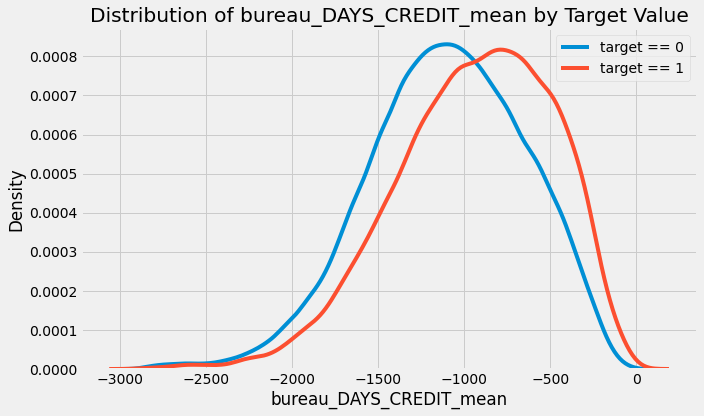

In [60]:
# let's plot kde for some of these features
plot_kde('bureau_DAYS_CREDIT_mean', app_train)

The correlation between client_bb_balance_MONTHS_BALANCE_count_mean and the TARGET is -0.08019279487546797
Median value for loan that was not repaid = 19.33
Median value for loan that was repaid = 25.14


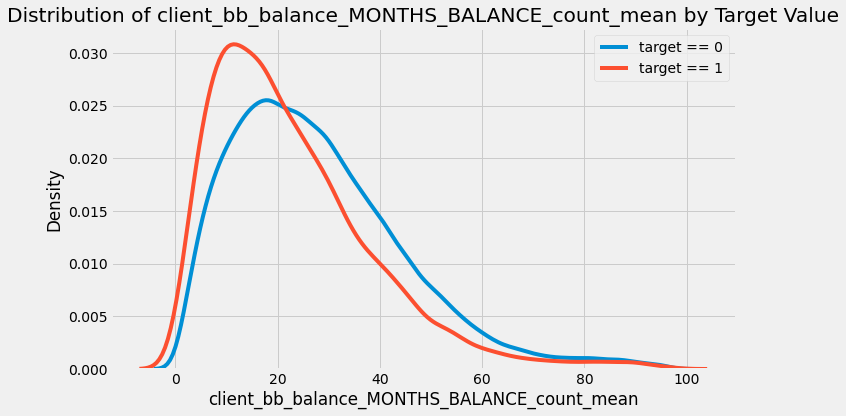

In [61]:
plot_kde('client_bb_balance_MONTHS_BALANCE_count_mean', app_train)

In [62]:
app_train.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,client_bb_balance_STATUS_X_mean_mean,client_bb_balance_STATUS_X_mean_max,client_bb_balance_STATUS_X_mean_min,client_bb_balance_STATUS_X_mean_sum,client_bb_balance_STATUS_X_sum_count,client_bb_balance_STATUS_X_sum_mean,client_bb_balance_STATUS_X_sum_max,client_bb_balance_STATUS_X_sum_min,client_bb_balance_STATUS_X_sum_sum,TARGET
0,100002,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0.161932,0.5,0.0,1.295455,8.0,1.875,3.0,0.0,15.0,1
1,100003,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,100004,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,100006,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,100007,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


<AxesSubplot:xlabel='CODE_GENDER', ylabel='count'>

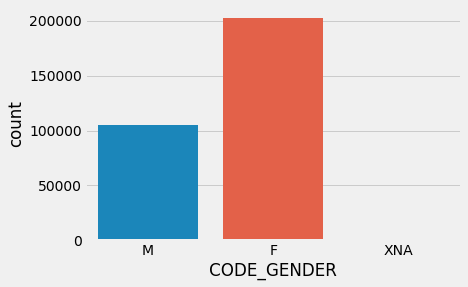

In [63]:
sns.countplot(x='CODE_GENDER', data=app_train)

<AxesSubplot:ylabel='AMT_INCOME_TOTAL'>

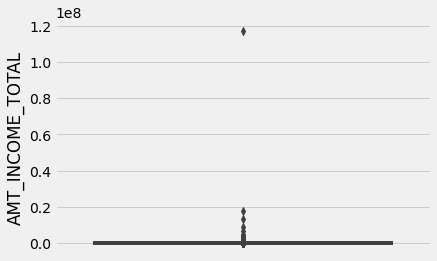

In [64]:
# let's look into the AMT_INCOME_TOTAL 

# plot a boxplot
sns.boxplot(y='AMT_INCOME_TOTAL', data=app_train)

In [65]:
# seems we have an outlier, let's see the value
app_train['AMT_INCOME_TOTAL'].max()

117000000.0

In [66]:
app_train.loc[app_train['AMT_INCOME_TOTAL'] == 117000000.0]

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,client_bb_balance_STATUS_X_mean_mean,client_bb_balance_STATUS_X_mean_max,client_bb_balance_STATUS_X_mean_min,client_bb_balance_STATUS_X_mean_sum,client_bb_balance_STATUS_X_sum_count,client_bb_balance_STATUS_X_sum_mean,client_bb_balance_STATUS_X_sum_max,client_bb_balance_STATUS_X_sum_min,client_bb_balance_STATUS_X_sum_sum,TARGET
12840,114967,Cash loans,F,N,Y,1,117000000.0,562491.0,26194.5,454500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


The correlation between AMT_INCOME_TOTAL and the TARGET is -0.003981865601205661
Median value for loan that was not repaid = 135000.0
Median value for loan that was repaid = 148500.0


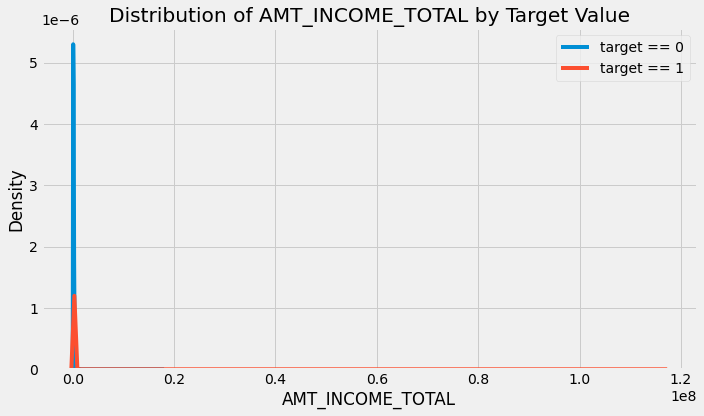

In [67]:
# let's plot KDE for it
plot_kde('AMT_INCOME_TOTAL', app_train)

this tells us nothing much

### Collinear variables

Let's drop some variables that are very collinear with each other. Looking for features with 0.8 and higher correlation with each other

In [69]:
# let's see the correlation matrix again
corrs = app_train.corr()

In [70]:
threshold = 0.8

# dictionary to hold correlated features
above_threshold_features = {}

# record only correlations above the threshold
for col in corrs:
    above_threshold_features[col] = list(corrs.index[corrs[col] > threshold])

In [72]:
cols_to_remove = []
cols_seen = []
cols_to_remove_pair = []

# Iterate through columns and correlated columns
for key, value in above_threshold_features.items():
    # Keep track of columns already examined
    cols_seen.append(key)
    for x in value:
        if x == key:
            next
        else:
            # Only want to remove one in a pair
            if x not in cols_seen:
                cols_to_remove.append(x)
                cols_to_remove_pair.append(key)
            
cols_to_remove = list(set(cols_to_remove))
print('Number of columns to remove: ', len(cols_to_remove))

Number of columns to remove:  138


In [73]:
# let's remove the features

train_corrs_removed = app_train.drop(columns=cols_to_remove)
test_corrs_removed = app_test.drop(columns = cols_to_remove)

train_corrs_removed.shape, test_corrs_removed.shape

((307511, 198), (48744, 197))

In [74]:
train_corrs_removed.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,...,client_bb_balance_STATUS_C_mean_max,client_bb_balance_STATUS_C_mean_min,client_bb_balance_STATUS_X_mean_mean,client_bb_balance_STATUS_X_mean_max,client_bb_balance_STATUS_X_mean_min,client_bb_balance_STATUS_X_mean_sum,client_bb_balance_STATUS_X_sum_mean,client_bb_balance_STATUS_X_sum_max,client_bb_balance_STATUS_X_sum_min,TARGET
0,100002,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Unaccompanied,...,0.8125,0.0,0.161932,0.5,0.0,1.295455,1.875,3.0,0.0,1
1,100003,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,Family,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,100004,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Unaccompanied,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,100006,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Unaccompanied,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,100007,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,Unaccompanied,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [75]:
train_corrs_removed.to_csv('train_corrs_removed.csv', index=False)
test_corrs_removed.to_csv('test_corrs_removed.csv', index=False)

In [76]:
gc.collect()

10229

In [77]:
# let's save the dataframes of all features engineered without correlations removed

app_train.to_csv('trainfeature_engineered1.csv', index=False)
app_test.to_csv('testfeature_engineered1.csv', index=False)

## ML Models

From the last notebook, we learnt that using Random Forests performed better than Logistic Regression. We engineered some new features from that notebook as well. We also learned that creating polynomial features and using SMOTE to handle class imbalance did not improve our model performance so we should probably leave that in this notebook. 

For the first step in the modelling process,we need to know if the features we added from the bureau & bureau tables improved our baseline score. We'll have several approaches on the process here

1. Simple Random Forest model on the train and test data. This is what we have from the last notebook and would be the baseline moving on. 
2. A Random Forest model on the train & test data with all the features from the bureau and bureau_balance tables (app_train and app_test)
3. A random Forst model on the train and test data with all the highly correlated features removed. (train_corrs_removed)
4. Improved model on both datasets from 2 and 3 to compare results

### Approach 1

In [78]:
# let's load fresh copies of the dataset

train = pd.read_csv('../input/home-credit-default-risk/application_train.csv')
test = pd.read_csv('../input/home-credit-default-risk/application_test.csv')
train.shape, test.shape

((307511, 122), (48744, 121))

In [79]:
# save the targets in a variable and remove it from TRAIN

train_labels = train['TARGET']

if 'TARGET' in train:
    train = train.drop(columns=['TARGET'])
else:
    train = train.copy()
train.shape, test.shape

((307511, 121), (48744, 121))

In [80]:
# let's encode the categorical features in train and test using the same steps from the prev notebook

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
le_count = 0 # this keeps a count of labels encoded

for col in train:
    if train[col].dtype == 'object':
        # if 2 or fewer unique categories
        if len(list(train[col].unique())) <= 2: # fit on the column
            label_encoder.fit(train[col])
            train[col] = label_encoder.transform(train[col])
            test[col] = label_encoder.transform(test[col])
            
            le_count += 1
            
print(f'{le_count} columns have been label encoded')

3 columns have been label encoded


In [81]:
# one hot encoding of features
train = pd.get_dummies(train)
test = pd.get_dummies(test)

# align the columns
train, test = train.align(test, join='inner', axis=1)

train.shape, test.shape

((307511, 239), (48744, 239))

In [82]:
train.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,...,0,0,0,0,0,0,1,0,1,0
1,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,...,0,1,0,0,0,0,0,0,1,0
2,100004,1,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,1,0,121500.0,513000.0,21865.5,513000.0,0.028663,...,0,0,0,0,0,0,0,0,0,0


In [83]:
# Pipeline for imputing missing values and scaling
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), 
    ('scaler', MinMaxScaler())
])

pipeline.fit(train)
train_transformed = pipeline.transform(train)
test_transformed = pipeline.transform(test)

In [84]:
# memory management
del pipeline

gc.collect()

24

In [85]:
from sklearn.ensemble import RandomForestClassifier

forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, verbose=1)
forest_classifier.fit(train_transformed, train_labels)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   29.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.1min finished


RandomForestClassifier(n_jobs=-1, random_state=42, verbose=1)

In [86]:
predictions = forest_classifier.predict_proba(test_transformed)[:, 1] # selecting only probablities of 1
predictions

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.8s finished


array([0.07, 0.17, 0.04, ..., 0.09, 0.04, 0.26])

In [87]:
submission = pd.DataFrame({'SK_ID_CURR': test['SK_ID_CURR'], 'TARGET': predictions})
submission.head()

,SK_ID_CURR,TARGET
0,100001,0.07
1,100005,0.17
2,100013,0.04
3,100028,0.07
4,100038,0.19


In [88]:
submission.to_csv('baseline.csv', index=False)

This gave a public score of  0.69435 on the Kaggle board. This is the baseline score we'll try to beat.

In [89]:
del train, test

gc.collect()

144

### Approach 2

Here we'll apply the same model on the app_train and app_test dataframes we had from the beginning of the notebook. This is the notebook with all the features engineered from bureau and bureau_balance tables

In [90]:
app_train.shape, app_test.shape

((307511, 336), (48744, 335))

In [91]:
app_train.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,client_bb_balance_STATUS_X_mean_mean,client_bb_balance_STATUS_X_mean_max,client_bb_balance_STATUS_X_mean_min,client_bb_balance_STATUS_X_mean_sum,client_bb_balance_STATUS_X_sum_count,client_bb_balance_STATUS_X_sum_mean,client_bb_balance_STATUS_X_sum_max,client_bb_balance_STATUS_X_sum_min,client_bb_balance_STATUS_X_sum_sum,TARGET
0,100002,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0.161932,0.5,0.0,1.295455,8.0,1.875,3.0,0.0,15.0,1
1,100003,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,100004,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,100006,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,100007,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [92]:
train_labels = app_train['TARGET']

if 'TARGET' in app_train:
    train = app_train.drop(columns=['TARGET'])
else:
    train = app_train.copy()

test = app_test.copy()
train.shape, test.shape

((307511, 335), (48744, 335))

In [93]:
# let's encode the categorical features in train and test using the same steps from the prev notebook

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
le_count = 0 # this keeps a count of labels encoded

for col in train:
    if train[col].dtype == 'object':
        # if 2 or fewer unique categories
        if len(list(train[col].unique())) <= 2: # fit on the column
            label_encoder.fit(train[col])
            train[col] = label_encoder.transform(train[col])
            test[col] = label_encoder.transform(test[col])
            
            le_count += 1
            
print(f'{le_count} columns have been label encoded')

3 columns have been label encoded


In [94]:
# one hot encoding of features
train = pd.get_dummies(train)
test = pd.get_dummies(test)

# align the columns
train, test = train.align(test, join='inner', axis=1)

train.shape, test.shape

((307511, 453), (48744, 453))

In [95]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), 
    ('scaler', MinMaxScaler())
])

pipeline.fit(train)
train_transformed = pipeline.transform(train)
test_transformed = pipeline.transform(test)

In [96]:
del train

gc.collect()

72

In [97]:
# memory management
del pipeline

gc.collect()

23

In [98]:
from sklearn.ensemble import RandomForestClassifier

forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, verbose=1)
forest_classifier.fit(train_transformed, train_labels)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   52.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.0min finished


RandomForestClassifier(n_jobs=-1, random_state=42, verbose=1)

In [99]:
predictions = forest_classifier.predict_proba(test_transformed)[:, 1] # selecting only probablities of 1
predictions

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.9s finished


array([0.15, 0.2 , 0.06, ..., 0.06, 0.14, 0.16])

In [100]:
submission = pd.DataFrame({'SK_ID_CURR': test['SK_ID_CURR'], 'TARGET': predictions})
submission.head()

,SK_ID_CURR,TARGET
0,100001,0.15
1,100005,0.20
2,100013,0.06
3,100028,0.06
4,100038,0.10


In [101]:
submission.to_csv('featurefrombb.csv', index=False)

This gave an improved score of 0.70024 on the kaggle board

In [102]:
del submission, train_transformed, test_transformed

gc.collect()

144

### Approach 3

The approach here is to train on the dataset after removing highly collinear features.

In [103]:
# let's load the dataset
train = pd.read_csv('./train_corrs_removed.csv')
test = pd.read_csv('./test_corrs_removed.csv')

train.shape, test.shape

((307511, 198), (48744, 197))

In [104]:
train_labels = train['TARGET']

if 'TARGET' in train:
    train = train.drop(columns=['TARGET'])
else:
    train = train.copy()
test = test.copy()
train.shape, test.shape

((307511, 197), (48744, 197))

In [105]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
le_count = 0 # this keeps a count of labels encoded

for col in train:
    if train[col].dtype == 'object':
        # if 2 or fewer unique categories
        if len(list(train[col].unique())) <= 2: # fit on the column
            label_encoder.fit(train[col])
            train[col] = label_encoder.transform(train[col])
            test[col] = label_encoder.transform(test[col])
            
            le_count += 1
            
print(f'{le_count} columns have been label encoded')

3 columns have been label encoded


In [106]:
# one hot encoding of features
train = pd.get_dummies(train)
test = pd.get_dummies(test)

# align the columns
train, test = train.align(test, join='inner', axis=1)

train.shape, test.shape

((307511, 315), (48744, 315))

In [107]:
pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), 
    ('scaler', MinMaxScaler())
])

pipeline.fit(train)
train_transformed = pipeline.transform(train)
test_transformed = pipeline.transform(test)

In [108]:
del train,pipeline

gc.collect()

69

In [109]:
forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, verbose=1)
forest_classifier.fit(train_transformed, train_labels)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   36.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.4min finished


RandomForestClassifier(n_jobs=-1, random_state=42, verbose=1)

In [110]:
predictions = forest_classifier.predict_proba(test_transformed)[:, 1] # selecting only probablities of 1
predictions

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.8s finished


array([0.11, 0.23, 0.07, ..., 0.12, 0.12, 0.23])

In [111]:
submission = pd.DataFrame({'SK_ID_CURR': test['SK_ID_CURR'], 'TARGET': predictions})
submission.head()

,SK_ID_CURR,TARGET
0,100001,0.11
1,100005,0.23
2,100013,0.07
3,100028,0.06
4,100038,0.20


In [112]:
submission.to_csv('featurecorrremoved.csv', index=False)

This gave a score of 0.70331 on the Kaggle board. Since this is better than the features gotten from the train and test datasets only AND also roughly equal to the dataset without highly correlated values removed, we'll move on using this dataset. 
Let's have an improved model on this dataset and see how our scores improve

### Approach 4 - Improved Model

For the improved model, we'll use XGBoost Classifier on the dataset

In [113]:
from xgboost import XGBClassifier

# let's create an XGBOOST model with some hyperparameters
model = XGBClassifier(n_estimators=100, max_depth = 10, random_state=42, n_jobs = -1, scale_pos_weight = 8, verbose=1)

In [114]:
# let's create new copies of the dataset with correlated features removed
train = pd.read_csv('./train_corrs_removed.csv')
test = pd.read_csv('./test_corrs_removed.csv')

train_labels = train['TARGET']

if 'TARGET' in train:
    train = train.drop(columns=['TARGET'])
else:
    train = train.copy()
test = test.copy()

In [115]:
label_encoder = LabelEncoder()
le_count = 0 # this keeps a count of labels encoded

for col in train:
    if train[col].dtype == 'object':
        # if 2 or fewer unique categories
        if len(list(train[col].unique())) <= 2: # fit on the column
            label_encoder.fit(train[col])
            train[col] = label_encoder.transform(train[col])
            test[col] = label_encoder.transform(test[col])
            
            le_count += 1
            
print(f'{le_count} columns have been label encoded')

3 columns have been label encoded


In [116]:
# one hot encoding of features
train = pd.get_dummies(train)
test = pd.get_dummies(test)

# align the columns
train, test = train.align(test, join='inner', axis=1)

train.shape, test.shape

((307511, 315), (48744, 315))

In [117]:
pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), 
    ('scaler', MinMaxScaler())
])

pipeline.fit(train)
train_transformed = pipeline.transform(train)
test_transformed = pipeline.transform(test)

In [118]:
model.fit(train_transformed, train_labels)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:38:31] WARNING: ../src/learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:38:37] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=8, subsample=1,
              tree_method='exact', validate_parameters=1, verbose=1,
              verbosity=None)

In [119]:
predictions = model.predict_proba(test_transformed)[:, 1] # selecting only probablities of 1
predictions

array([0.02559904, 0.31826594, 0.0081143 , ..., 0.0217398 , 0.02171968,
       0.21556921], dtype=float32)

In [120]:
submission = pd.DataFrame({'SK_ID_CURR': test['SK_ID_CURR'], 'TARGET': predictions})
submission.head()

,SK_ID_CURR,TARGET
0,100001,0.025599
1,100005,0.318266
2,100013,0.008114
3,100028,0.049658
4,100038,0.408825


In [121]:
submission.to_csv('xgboostmodel.csv', index=False)

The improved model had a score of 0.70736 on the Kaggle board which is better than the Random Forest Classifier model.

### Future Works

1. Optimize the modelling process to make use of Cross Validation and Hyperparameter tuning
2. Features from other datasets
3. Using other improved techniques for improving the score and explainablity.

### Optimizing the modelling process

Let's wrap the modelling process into a function and involve the use of cross validation

In [122]:
from lightgbm import LGBMClassifier # we'll also use this along with XGBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder

In [126]:
import lightgbm

In [131]:
def train_model(features, test_features, encoding='ohe', n_folds=5):
    """Train and test model using cross validation
    
    Args:
          model: to use different models to train the dataset
          train_features: train dataset with the TARGET
          test_features: test dataset to predict on
          encoding: encoding scheme to use on the dataset. Either ohe/le
          n_folds: number of folds to use for cross validation
          
    Returns: 
            
            
            """
    labels = features['TARGET']
    train_ids = features['SK_ID_CURR']
    test_ids = test_features['SK_ID_CURR']
    
    features = features.drop(columns=['TARGET', 'SK_ID_CURR'])
    test_features = test_features.drop(columns=['SK_ID_CURR'])
    
    if encoding == 'ohe':
        features = pd.get_dummies(features)
        test_features = pd.get_dummies(test_features)
        
        features, test_features = features.align(test_features, join='inner', axis=1)
        cat_indices = 'auto'
        
    elif encoding == 'le':
        label_encoder = LabelEncoder()
        cat_indices = []
        
        for i,col in enumerate(features):
            if features[col].dtype == 'object':
                label_encoder.fit(features[col])
                features[col] = label_encoder.transform(np.array(features[col].astype(str)).reshape((-1,)))
                test_features[col] = label_encoder.transform(np.array(test_features[col].astype(str)).reshape((-1,)))
                cat_indices.append(i)
    else:
        raise ValueError('encoding must either be ohe or le')
     
    print('Training Data Shape: ', features.shape)
    print('Testing Data Shape: ', test_features.shape)
    
     # Extract feature names
    feature_names = list(features.columns)
    
    # Convert to np arrays
    features = np.array(features)
    test_features = np.array(test_features)
    
    # Create the kfold object
    k_fold = KFold(n_splits = n_folds, shuffle = False)
    
    # Empty array for feature importances
    feature_importance_values = np.zeros(len(feature_names))
    
    # Empty array for test predictions
    test_predictions = np.zeros(test_features.shape[0])
    
    # Empty array for out of fold validation predictions
    out_of_fold = np.zeros(features.shape[0])
    
    # Lists for recording validation and training scores
    valid_scores = []
    train_scores = []
    
    # Iterate through each fold
    for train_indices, valid_indices in k_fold.split(features):
        
        # Training data for the fold
        train_features, train_labels = features[train_indices], labels[train_indices]
        # Validation data for the fold
        valid_features, valid_labels = features[valid_indices], labels[valid_indices]
        
        # Create the model
        model = LGBMClassifier(n_estimators=10000, objective = 'binary', 
                                   class_weight = 'balanced', learning_rate = 0.05, 
                                   reg_alpha = 0.1, reg_lambda = 0.1, 
                                   subsample = 0.8, n_jobs = -1, random_state = 50)
        
        # Train the model
        model.fit(train_features, train_labels, eval_metric = 'auc',
                  eval_set = [(valid_features, valid_labels), (train_features, train_labels)],
                  eval_names = ['valid', 'train'], categorical_feature = cat_indices, early_stopping_rounds=100, verbose=200)
        
        # Record the best iteration
        best_iteration = model.best_iteration_
        
        # Record the feature importances
        feature_importance_values += model.feature_importances_ / k_fold.n_splits
        # Make predictions
        test_predictions += model.predict_proba(test_features, num_iteration = best_iteration)[:, 1] / k_fold.n_splits
        
        # Record the out of fold predictions
        out_of_fold[valid_indices] = model.predict_proba(valid_features, num_iteration = best_iteration)[:, 1]
        
        # Record the best score
        valid_score = model.best_score_['valid']['auc']
        train_score = model.best_score_['train']['auc']
        
        valid_scores.append(valid_score)
        train_scores.append(train_score)
        # Clean up memory
        gc.enable()
        del model, train_features, valid_features
        gc.collect()
        
    # Make the submission dataframe
    submission = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictions})
    
    # Make the feature importance dataframe
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})
    
    # Overall validation score
    valid_auc = roc_auc_score(labels, out_of_fold)
    # Add the overall scores to the metrics
    valid_scores.append(valid_auc)
    train_scores.append(np.mean(train_scores))
    
    # Needed for creating dataframe of validation scores
    fold_names = list(range(n_folds))
    fold_names.append('overall')
    
    # Dataframe of validation scores
    metrics = pd.DataFrame({'fold': fold_names,
                            'train': train_scores,
                            'valid': valid_scores}) 
    
    return submission, feature_importances, metrics

In [124]:
train = pd.read_csv('./train_corrs_removed.csv')
test = pd.read_csv('./test_corrs_removed.csv')

In [132]:
submission, feature_importances, metrics = train_model(train, test)

Training Data Shape:  (307511, 317)
Testing Data Shape:  (48744, 317)


/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[200]	train's auc: 0.804983	train's binary_logloss: 0.542342	valid's auc: 0.761622	valid's binary_logloss: 0.557319
[400]	train's auc: 0.836605	train's binary_logloss: 0.51062	valid's auc: 0.76221	valid's binary_logloss: 0.537461


/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[200]	train's auc: 0.805134	train's binary_logloss: 0.542195	valid's auc: 0.763578	valid's binary_logloss: 0.561378


/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[200]	train's auc: 0.806306	train's binary_logloss: 0.540677	valid's auc: 0.755081	valid's binary_logloss: 0.558511
[400]	train's auc: 0.838346	train's binary_logloss: 0.508283	valid's auc: 0.754456	valid's binary_logloss: 0.538826


/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[200]	train's auc: 0.804628	train's binary_logloss: 0.542748	valid's auc: 0.76283	valid's binary_logloss: 0.556839


/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[200]	train's auc: 0.804748	train's binary_logloss: 0.542554	valid's auc: 0.763883	valid's binary_logloss: 0.557603
[400]	train's auc: 0.836643	train's binary_logloss: 0.510583	valid's auc: 0.763949	valid's binary_logloss: 0.537937


In [133]:
submission.head()

,SK_ID_CURR,TARGET
0,100001,0.274670
1,100005,0.649863
2,100013,0.114761
3,100028,0.296804
4,100038,0.722892


In [134]:
submission.to_csv('lgbm_model.csv', index=False)

This improved model had a score of 0.75574 on the Kaggle board. This is an impressive jump in performance. 

In [135]:
# let's see the metrics

metrics

,fold,train,valid
0,0,0.836761,0.762248
1,1,0.809011,0.763818
2,2,0.823753,0.755290
3,3,0.810219,0.763093
4,4,0.832131,0.764363
5,overall,0.822375,0.761715


In [139]:
feature_importances.sort_values(by='importance', ascending=False).head(10)

,feature,importance
22,EXT_SOURCE_1,540.8
24,EXT_SOURCE_3,437.6
23,EXT_SOURCE_2,431.6
5,DAYS_BIRTH,383.4
2,AMT_CREDIT,357.0
3,AMT_ANNUITY,286.2
6,DAYS_EMPLOYED,264.2
8,DAYS_ID_PUBLISH,215.4
9,OWN_CAR_AGE,177.6
72,bureau_DAYS_CREDIT_ENDDATE_max,173.8


In [140]:
# let's plot the feature importances

def plot_feature_importances(df):
    """Plot importances returned by a model. This works with any measure of feature importances provided that higher is better
     Args:
        df (dataframe): feature importances. Must have the features in a column
        called `features` and the importances in a column called `importance

    Returns: shows a plot of the 15 most importance features
        df (dataframe): feature importances sorted by importance (highest to lowest) 
        with a column for normalized importance
  """
    df = df.sort_values('importance', ascending=False).reset_index()
  
  # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

  # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
  
  # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
  # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()

    return df

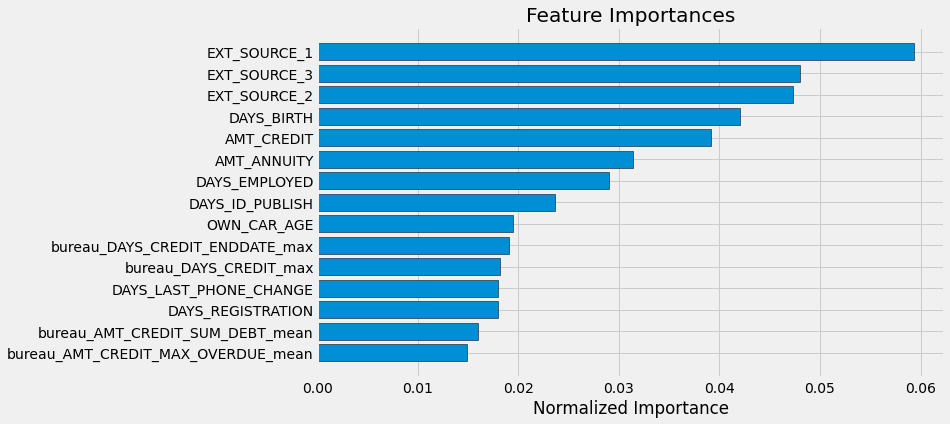

,index,feature,importance,importance_normalized
0,22,EXT_SOURCE_1,540.8,0.059337
1,24,EXT_SOURCE_3,437.6,0.048014
2,23,EXT_SOURCE_2,431.6,0.047356
3,5,DAYS_BIRTH,383.4,0.042067
4,2,AMT_CREDIT,357.0,0.039171
...,...,...,...,...
312,113,bureau_CREDIT_TYPE_Cash loan (non-earmarked)_mean,0.0,0.000000
313,110,bureau_CREDIT_TYPE_Another type of loan_sum,0.0,0.000000
314,108,bureau_CREDIT_CURRENCY_currency 4_mean,0.0,0.000000
315,107,bureau_CREDIT_CURRENCY_currency 3_sum,0.0,0.000000


In [141]:
plot_feature_importances(feature_importances)